In [15]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.neural_network import MLPClassifier

plt.style.use('seaborn-v0_8-whitegrid')

In [16]:
# Carrega todos os dados de landmarks
DATA_DIR = "../data/landmarks"
X_full, y_full_labels = [], []

for file in os.listdir(DATA_DIR):
    if file.endswith('.csv'):
        label = file.split('.')[0]
        df = pd.read_csv(os.path.join(DATA_DIR, file), header=None)
        X_full.append(df.values)
        y_full_labels.extend([label] * len(df))

X_full = np.vstack(X_full)

# Codifica os rótulos
le = LabelEncoder()
y_full_encoded = le.fit_transform(y_full_labels)

# Normaliza os dados
scaler = StandardScaler()
X_full_scaled = scaler.fit_transform(X_full)

print("Dataset completo carregado e processado.")

Dataset completo carregado e processado.


In [17]:
# Aplica o PCA para reduzir de 63 para 2 dimensões
pca = PCA(n_components=2)
X_2D = pca.fit_transform(X_full_scaled)

print("Dados reduzidos para 2 dimensões com sucesso.")

Dados reduzidos para 2 dimensões com sucesso.


In [18]:
# Para não sobrecarregar o gráfico, vamos visualizar apenas algumas classes
classes_to_visualize = ['A', 'B', 'C', 'L', 'NENHUM']
indices_to_keep = [i for i, label in enumerate(y_full_labels) if label in classes_to_visualize]

X_2D_subset = X_2D[indices_to_keep]
y_subset_encoded = y_full_encoded[indices_to_keep]

print("Treinando um modelo MLP no subconjunto de dados 2D para visualização...")
model_2d = MLPClassifier(hidden_layer_sizes=(64, 32), max_iter=500, random_state=42)
model_2d.fit(X_2D_subset, y_subset_encoded)
print("Modelo de visualização treinado.")

Treinando um modelo MLP no subconjunto de dados 2D para visualização...
Modelo de visualização treinado.


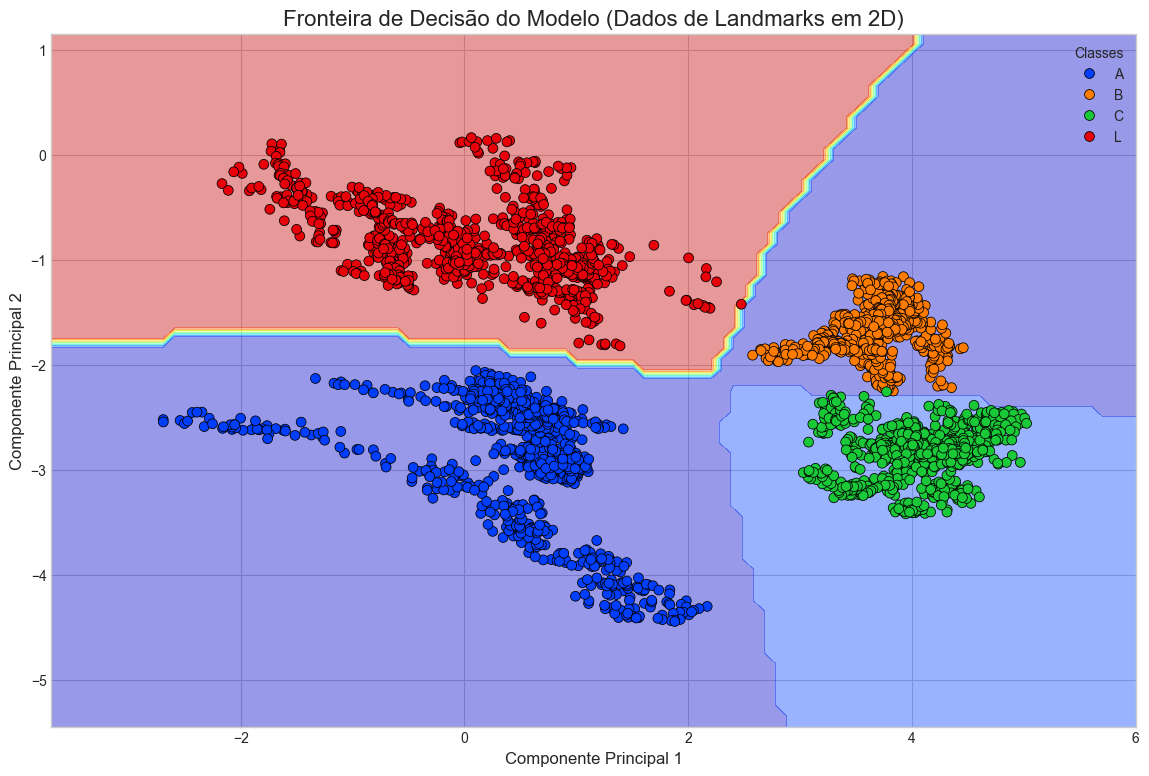

In [19]:
# Cria uma malha de pontos para cobrir a área do gráfico
x_min, x_max = X_2D_subset[:, 0].min() - 1, X_2D_subset[:, 0].max() + 1
y_min, y_max = X_2D_subset[:, 1].min() - 1, X_2D_subset[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

# Faz predições em cada ponto da malha
Z = model_2d.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plota o gráfico
plt.figure(figsize=(14, 9))
# Desenha as áreas coloridas da fronteira de decisão
plt.contourf(xx, yy, Z, alpha=0.4, cmap=plt.cm.jet)
# Plota os pontos de dados reais
sns.scatterplot(x=X_2D_subset[:, 0], y=X_2D_subset[:, 1], hue=le.inverse_transform(y_subset_encoded),
                palette='bright', s=50, edgecolor='k')

plt.title('Fronteira de Decisão do Modelo (Dados de Landmarks em 2D)', fontsize=16)
plt.xlabel('Componente Principal 1', fontsize=12)
plt.ylabel('Componente Principal 2', fontsize=12)
plt.legend(title='Classes')
plt.show()

In [22]:
# Carrega todos os dados de landmarks
DATA_DIR = "../data/landmarks"
X_full, y_full_labels = [], []

for file in os.listdir(DATA_DIR):
    if file.endswith('.csv'):
        label = file.split('.')[0]
        df = pd.read_csv(os.path.join(DATA_DIR, file), header=None)
        X_full.append(df.values)
        y_full_labels.extend([label] * len(df))

X_full = np.vstack(X_full)
y_full_labels = np.array(y_full_labels)

# Codifica os rótulos
le = LabelEncoder()
y_full_encoded = le.fit_transform(y_full_labels)

# Normaliza os dados
scaler = StandardScaler()
X_full_scaled = scaler.fit_transform(X_full)

# Aplica o PCA para reduzir de 63 para 2 dimensões
pca = PCA(n_components=2)
X_2D = pca.fit_transform(X_full_scaled)

print("Dataset completo carregado e reduzido para 2D.")
class_names = le.classes_
print(f"Classes encontradas: {class_names}")

Dataset completo carregado e reduzido para 2D.
Classes encontradas: ['A' 'B' 'C' 'D' 'E' 'F' 'G' 'H' 'I' 'J' 'K' 'L' 'M' 'N' 'O' 'P' 'Q' 'R'
 'S' 'T' 'U' 'V' 'W' 'X' 'Y' 'Z']


In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.neural_network import MLPClassifier
import math

plt.style.use('seaborn-v0_8-whitegrid')

--- Treinando e plotando para o grupo: A, B, C, D, E, F ---


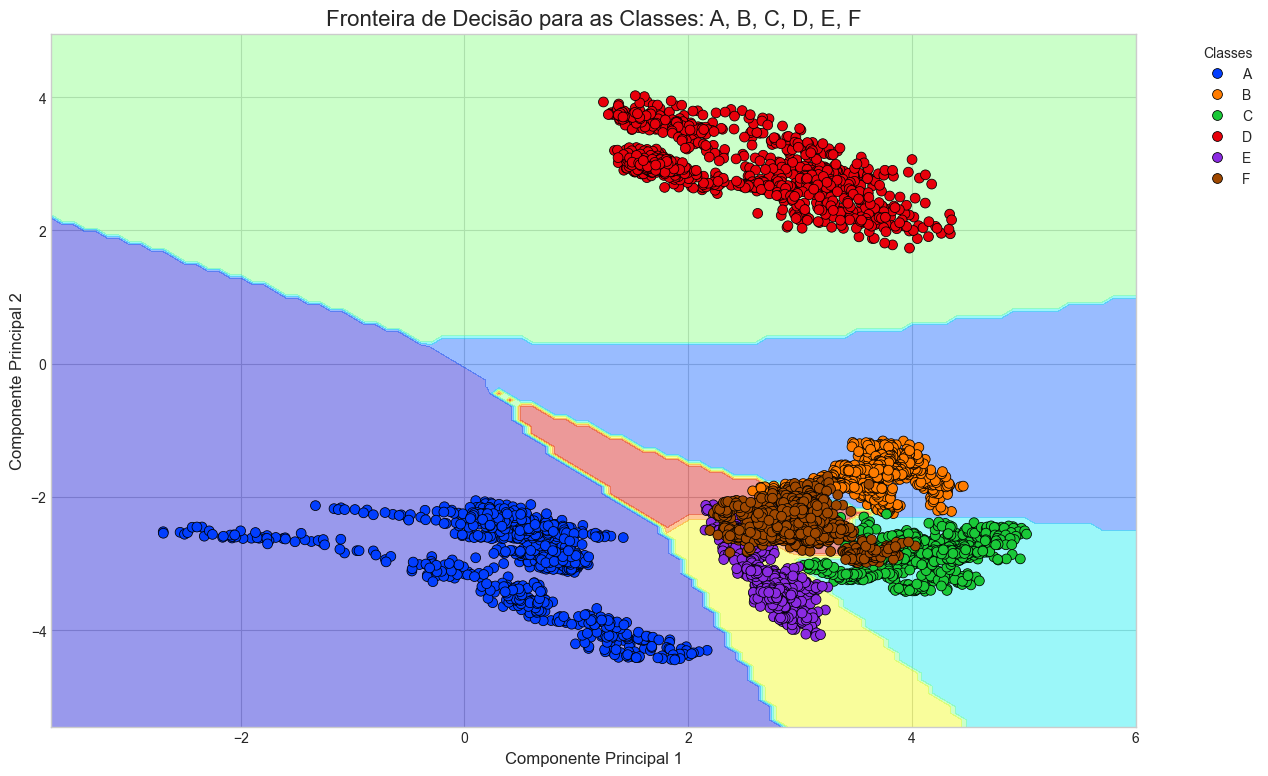

--- Treinando e plotando para o grupo: G, H, I, J, K, L ---


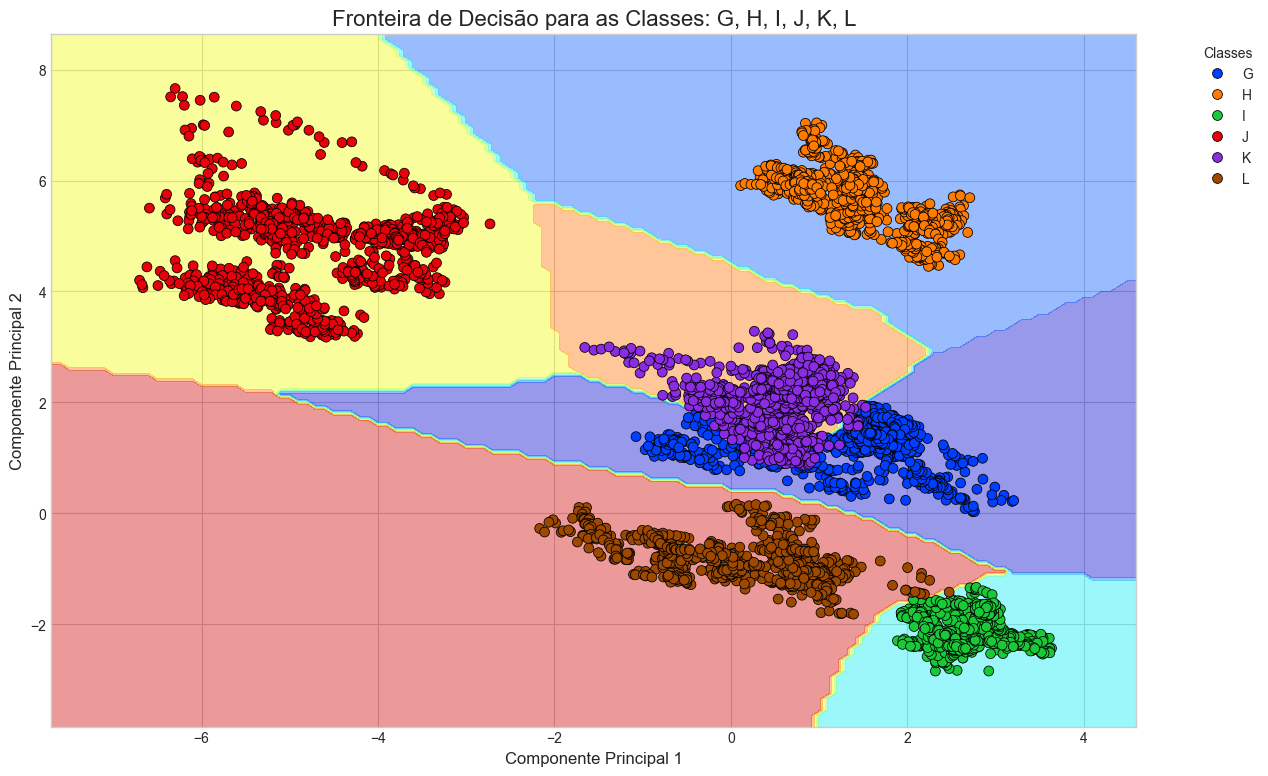

--- Treinando e plotando para o grupo: M, N, O, P, Q, R ---


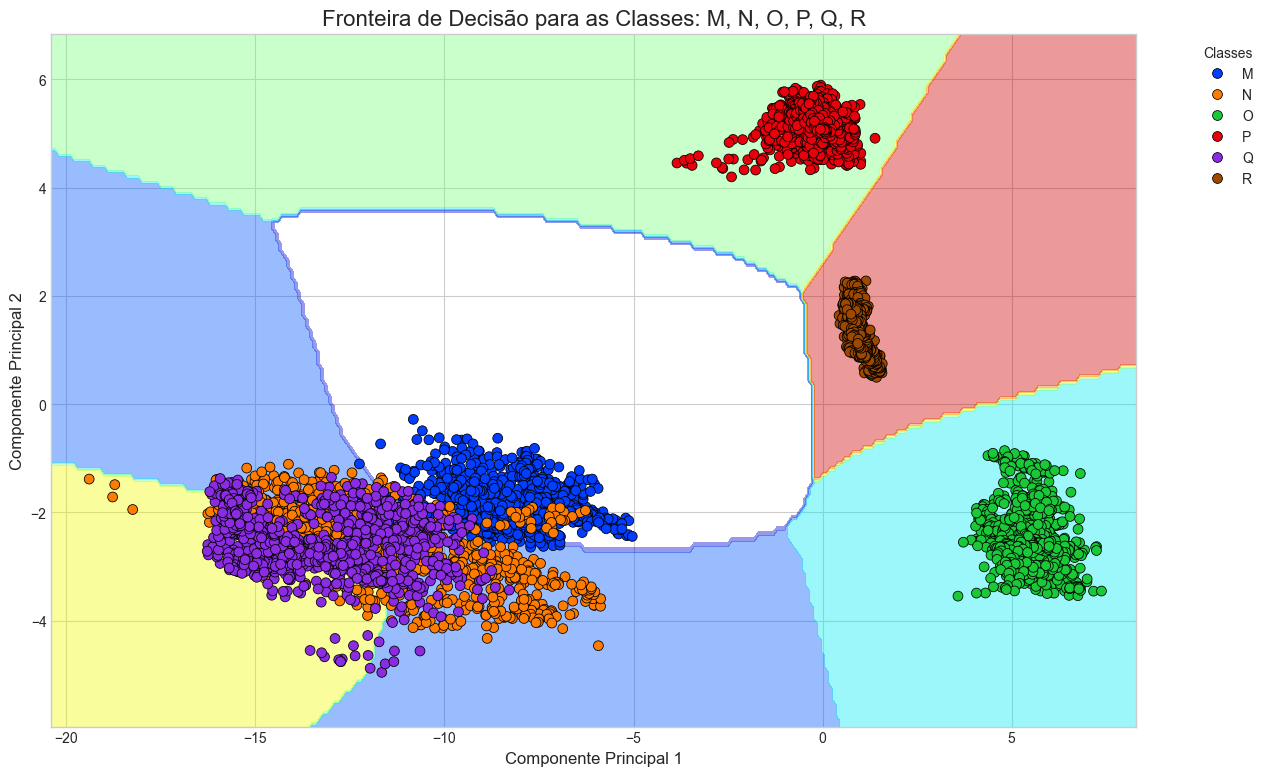

--- Treinando e plotando para o grupo: S, T, U, V, W, X ---


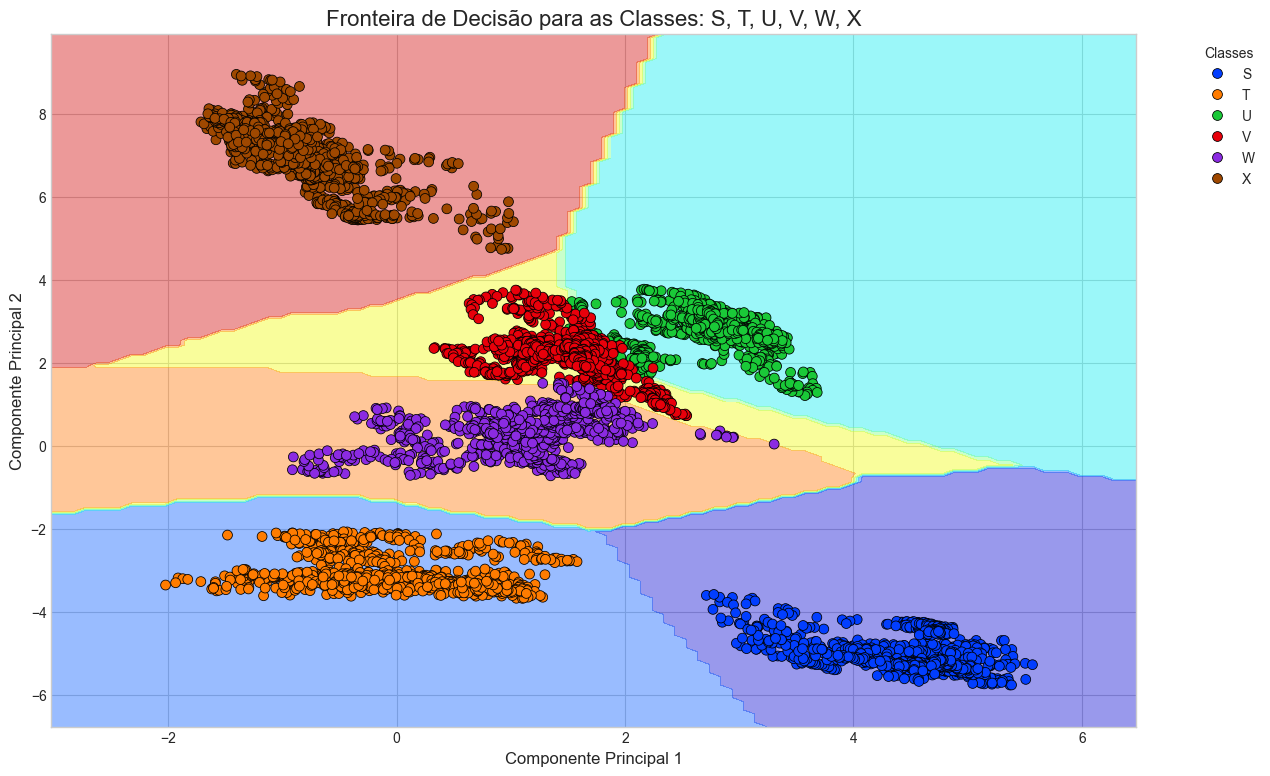

--- Treinando e plotando para o grupo: Y, Z ---


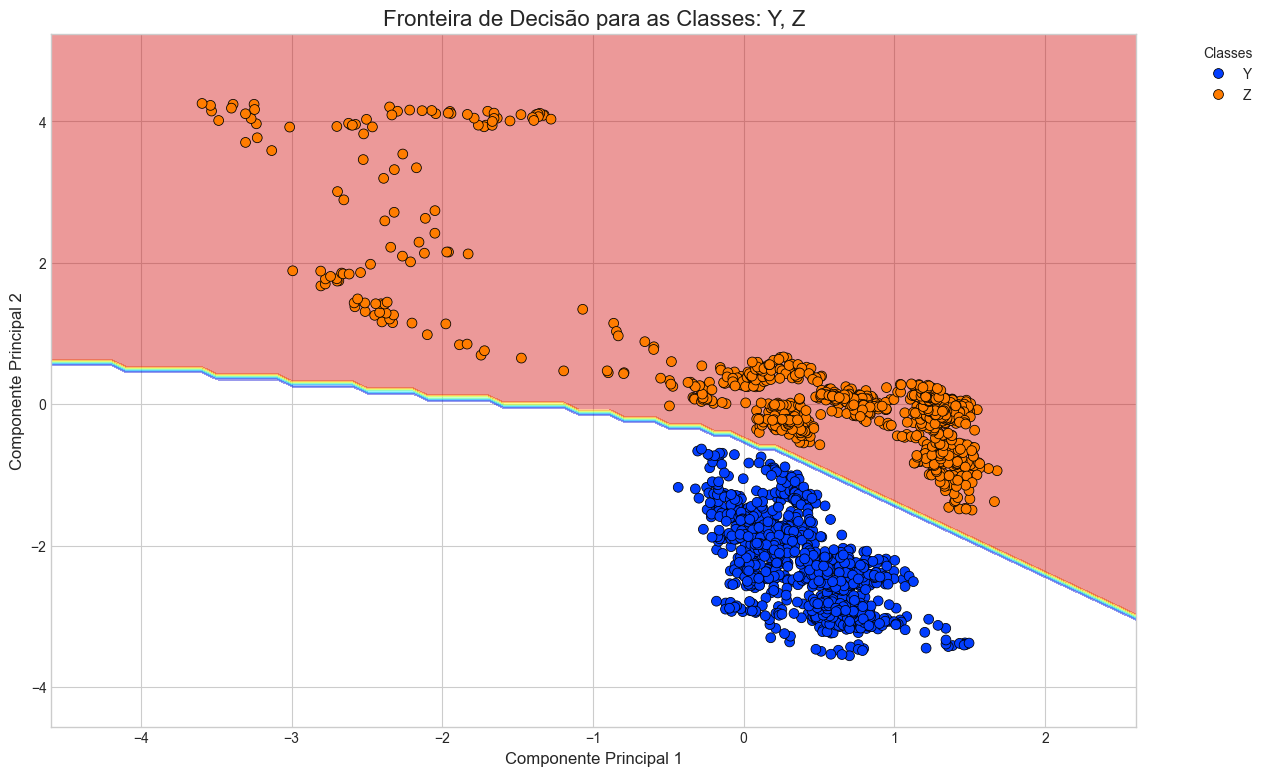

In [25]:
def plot_decision_boundary_for_group(class_group, X_2D, y_labels, le):
    """
    Filtra os dados para um grupo de classes, treina um modelo MLP,
    e plota a fronteira de decisão.
    """
    # Filtra os dados para manter apenas as classes do grupo atual
    indices_to_keep = np.isin(y_labels, class_group)
    X_subset = X_2D[indices_to_keep]
    y_subset_labels = y_labels[indices_to_keep]
    
    # Recodifica os rótulos para o subconjunto
    y_subset_encoded = le.transform(y_subset_labels)
    
    print(f"--- Treinando e plotando para o grupo: {', '.join(class_group)} ---")
    
    # Treina um modelo MLP apenas neste subconjunto de dados 2D
    model_2d_group = MLPClassifier(hidden_layer_sizes=(64, 32), max_iter=500, random_state=42)
    model_2d_group.fit(X_subset, y_subset_encoded)
    
    # Cria a malha de pontos para o gráfico
    x_min, x_max = X_subset[:, 0].min() - 1, X_subset[:, 0].max() + 1
    y_min, y_max = X_subset[:, 1].min() - 1, X_subset[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                         np.arange(y_min, y_max, 0.1))

    # Faz predições na malha
    Z_encoded = model_2d_group.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z_encoded.reshape(xx.shape)

    # Plota o gráfico
    plt.figure(figsize=(14, 9))
    plt.contourf(xx, yy, Z, alpha=0.4, cmap=plt.cm.jet)
    
    sns.scatterplot(x=X_subset[:, 0], y=X_subset[:, 1], hue=y_subset_labels,
                    palette='bright', s=50, edgecolor='k')
    
    plt.title(f"Fronteira de Decisão para as Classes: {', '.join(class_group)}", fontsize=16)
    plt.xlabel('Componente Principal 1', fontsize=12)
    plt.ylabel('Componente Principal 2', fontsize=12)
    plt.legend(title='Classes', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.show()


# Divide as classes em grupos de 6
group_size = 6
num_groups = math.ceil(len(class_names) / group_size)

for i in range(num_groups):
    start_index = i * group_size
    end_index = start_index + group_size
    class_group = class_names[start_index:end_index]
    plot_decision_boundary_for_group(class_group, X_2D, y_full_labels, le)